1) Design model (input,output size, forward pass)

2) Construct loss and optimizer

3) Training loop


1.   Forward pass : compute prediction and loss
2.   Bacckward pass: gradients
3.   Update weights





In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

***Prepare data***

In [5]:
# Let's generate a regression dataset

x_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

# Converting this into a torch tensor

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# Reshape our y

y = y.view(y.shape[0],1)

n_samples,n_features = x.shape




***Model***

In [6]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size,output_size)


***Loss and optimizer***

In [7]:
learning_rate = 0.01
criterion =  nn.MSELoss()  # Built in loss fuction from pyTorch in the case of linear regression 
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)


***Training Loop***

epoch : 10, loss= 4346.3130
epoch : 20, loss= 3243.9629
epoch : 30, loss= 2446.2266
epoch : 40, loss= 1868.3203
epoch : 50, loss= 1449.2566
epoch : 60, loss= 1145.1021
epoch : 70, loss= 924.1633
epoch : 80, loss= 763.5502
epoch : 90, loss= 646.7086
epoch : 100, loss= 561.6542


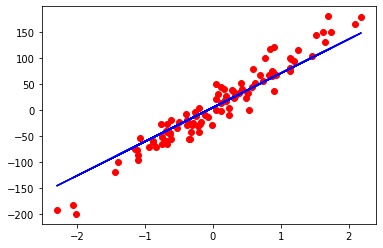

In [8]:
num_epochs = 100

for epoch in range(num_epochs):

  # forward pass and loss
  y_predicted = model(x)
  loss = criterion(y_predicted,y)

  # backward pass for calcuating the gradients
  loss.backward()

  # update
  optimizer.step()

  optimizer.zero_grad()

  if(epoch+1)%10 == 0:
    print(f'epoch : {epoch+1}, loss= {loss.item():.4f}')

# plot

predicted = model(x).detach().numpy()   # New tensor
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predicted,'b')
plt.show()